In [1]:
import tensorflow as tf

In [2]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import math
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt


In [3]:
import logging 
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
# This handles the download and the metadata in one go
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

# Separate the data
train_dataset, test_dataset = dataset['train'], dataset['test']

# Create the labels list
class_names = metadata.features['label'].names

print("SUCCESS: Data is ready to use!")
print("Classes:", class_names)

SUCCESS: Data is ready to use!
Classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [5]:
print("Classes : {}".format(class_names))

Classes : ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [6]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples : {}".format(num_train_examples))
print("Number of testing examples : {}".format(num_test_examples))

Number of training examples : 60000
Number of testing examples : 10000


In [7]:
def normalize(images,labels):
    images = tf.cast(images, tf.float32)
    images/=255
    return images,labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

- Raw image pixels: [0, 128, 255]
- After tf.cast: [0.0, 128.0, 255.0]
- After /255: [0.0, 0.5, 1.0]
- Returned with its label → (normalized_image, label)




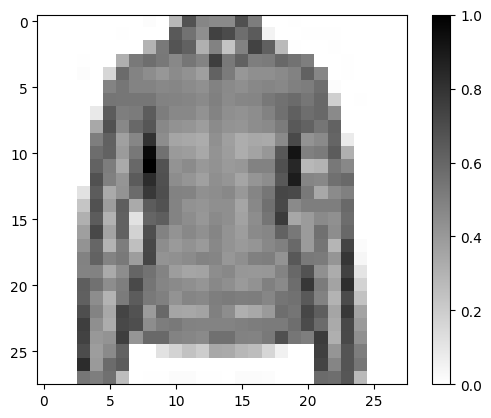

In [8]:
# take a single image and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
    break
image =image.numpy().reshape((28,28))

#plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


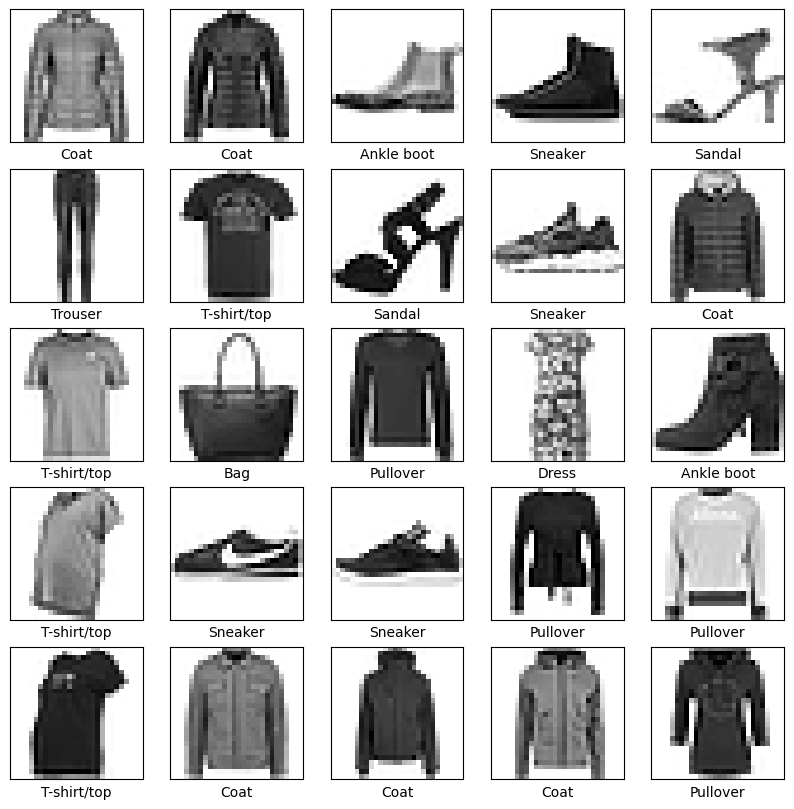

In [9]:
plt.figure(figsize=(10,10))
i=0
for(image,label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid()
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i+=1
plt.show()

# Convolutional Neural Network

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), padding='same',activation=tf.nn.relu, input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    
    tf.keras.layers.Conv2D(64,(3,3), padding='same',activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    
])

In [11]:
model.compile(
    
    optimizer='adam',
    
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']    
)

In [12]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [13]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 25s 12ms/step - loss: 0.3873 - accuracy: 0.8609
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2592 - accuracy: 0.9056
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2118 - accuracy: 0.9229
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1817 - accuracy: 0.9328
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1551 - accuracy: 0.9418
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1297 - accuracy: 0.9521
Epoch 7/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.1090 - accuracy: 0.9599
Epoch 8/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0918 - accuracy: 0.9663
Epoch 9/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0763 - accuracy: 0.9713
Epoch 10/10
1875/1875 [==============================] - 25s 13m

In [14]:
test_loss ,test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset :', test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.3188 - accuracy: 0.9208
Accuracy on test dataset : 0.920799970626831


In [15]:
for test_images,test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

1/1 [==============================] - 0s 85ms/step


In [16]:
predictions.shape

(32, 10)

In [17]:
predictions[0]

array([3.04749790e-08, 2.08759676e-08, 5.89931500e-04, 1.39755388e-10,
       9.38036501e-01, 1.01349935e-11, 6.13735765e-02, 2.72682016e-11,
       4.40360415e-09, 4.09506455e-08], dtype=float32)

In [18]:
class_indx = np.argmax(predictions[0])

In [19]:
test_labels[0]

4

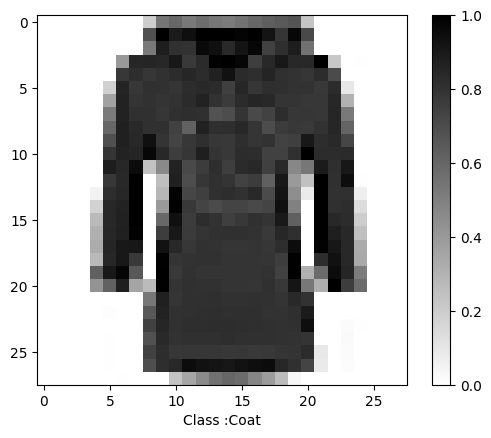

In [20]:
# take a single image and remove the color dimension by reshaping
for image, label in test_dataset.take(0):
    break


#plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.xlabel('Class :{}'.format(class_names[class_indx]))
plt.show()


In [28]:
def plot_image(i, predictions_array, true_labels, images):
    """
    Show a single image with predicted label, confidence %, and true label.
    Correct predictions = blue text, incorrect = red text.
    """
    prediction, true_label, img = predictions_array[i], true_labels[i], images[i]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # Display the image
    plt.imshow(img[..., 0], cmap=plt.cm.binary)

    # Predicted label
    predicted_label = np.argmax(prediction)
    confidence = 100 * np.max(prediction)

    # Color coding
    color = 'blue' if predicted_label == true_label else 'red'

    # Label text
    plt.xlabel(
        f"Predicted: {class_names[predicted_label]} ({confidence:.0f}%)\nTrue: {class_names[true_label]}",
        color=color,
        fontsize=10
    )


def plot_value_array(i, predictions_array, true_labels):
    """
    Show a bar chart of prediction probabilities for all classes.
    Predicted label = red bar, true label = blue bar.
    """
    prediction, true_label = predictions_array[i], true_labels[i]

    plt.grid(False)
    plt.yticks([0, 0.5, 1.0])
    plt.ylim([0, 1])

    # Add class names as x-axis labels
    plt.xticks(range(len(class_names)), class_names, rotation=45, fontsize=8)

    bars = plt.bar(range(len(class_names)), prediction, color="#777777")
    predicted_label = np.argmax(prediction)

    # Highlight predicted and true labels
    bars[predicted_label].set_color('red')
    bars[true_label].set_color('blue')

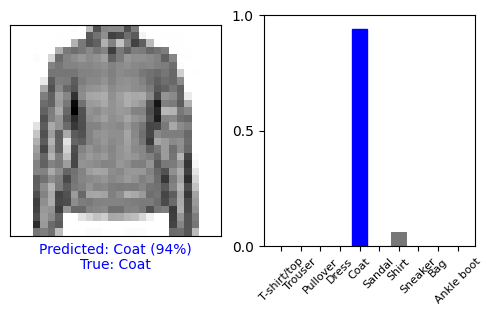

In [29]:
i =0 
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions, test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)


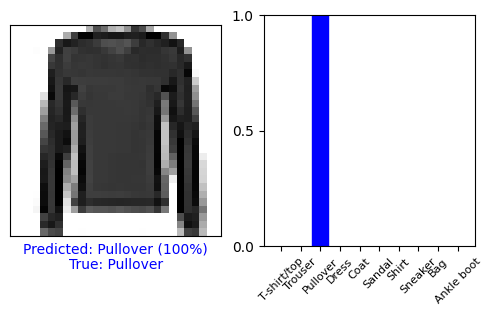

In [30]:
i = 12 
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions, test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)

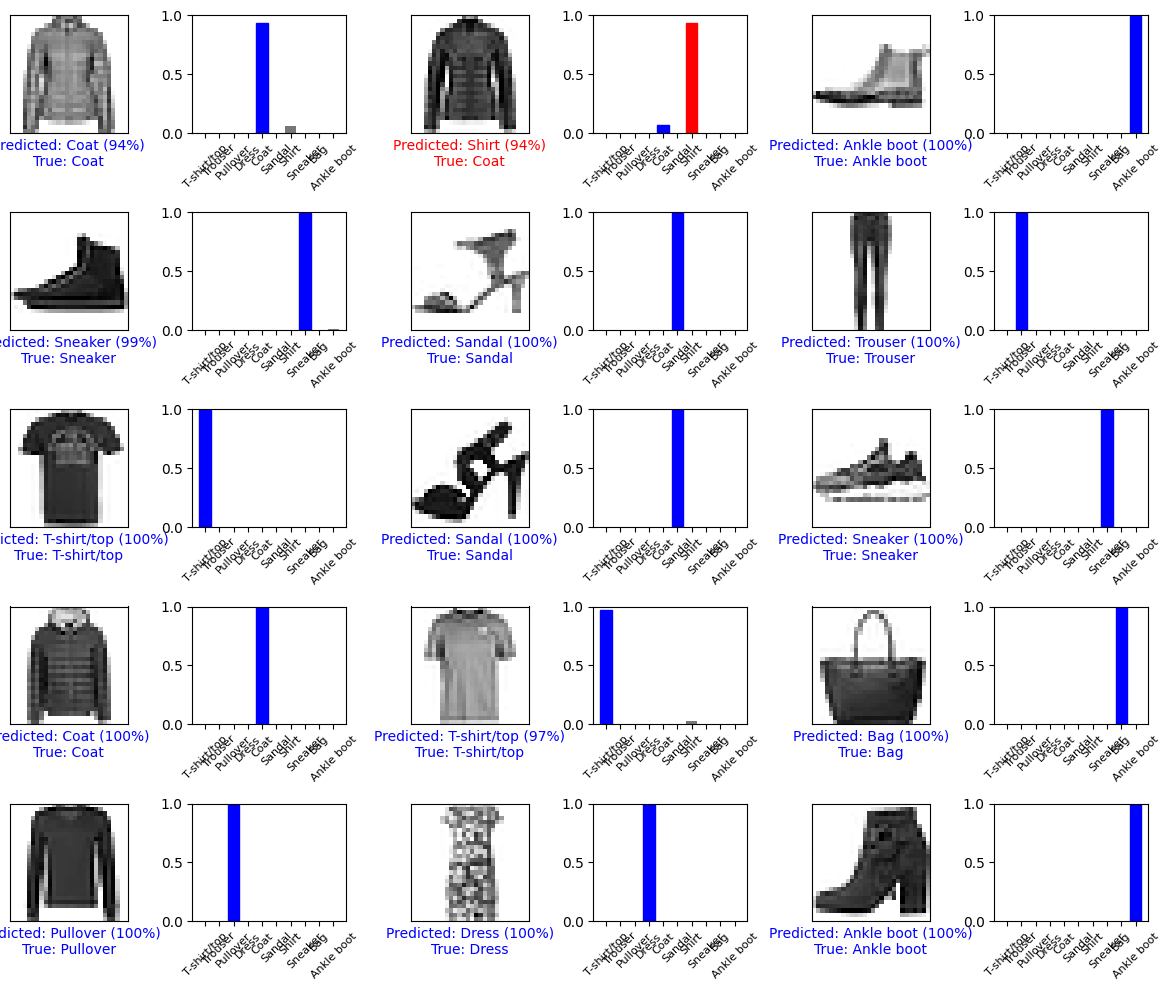

In [32]:
num_rows = 5
num_cols =3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols,2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(num_rows, 2*num_cols,2*i+2)
    plot_value_array(i,predictions,test_labels)

plt.tight_layout()

In [53]:
img = test_images[20]
true_label = test_labels[20]
print("Original shape:",img.shape)

Original shape: (28, 28, 1)


In [56]:
img = img.reshape((1,28,28,1))
print("Reshaped for model:",img.shape)

Reshaped for model: (1, 28, 28, 1)


In [57]:
predictions_single = model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 24ms/step
[[9.7322392e-01 2.3993561e-12 7.6607132e-05 2.3021544e-08 9.4995436e-08
  2.7020072e-10 2.6699161e-02 2.5615193e-10 2.5830860e-07 1.2386390e-14]]


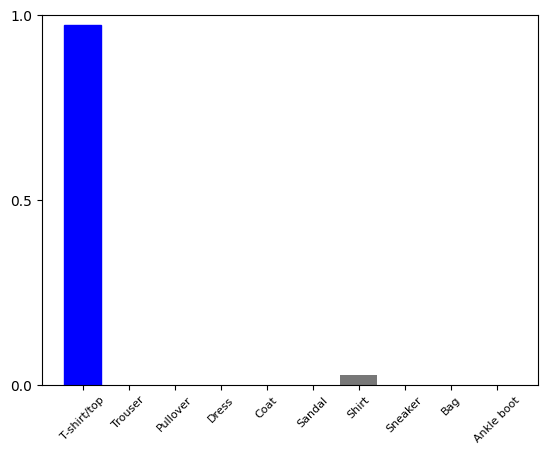

In [59]:
plot_value_array(0,predictions_single,[true_label])
plt.xticks(range(10),class_names,rotation=45)
plt.show()

In [60]:
predicted_label = np.argmax(predictions_single[0])
print("predicted class : {}".format(class_names[predicted_label]))

predicted class : T-shirt/top


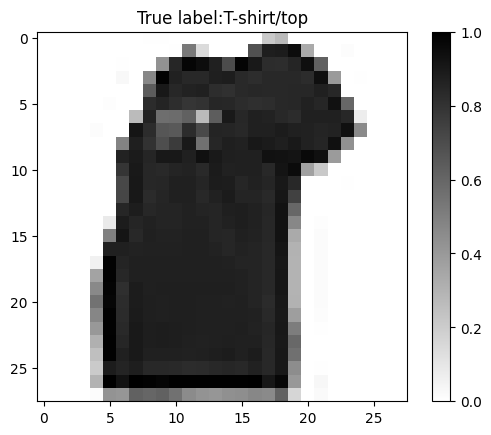

In [69]:
img = test_images[20]
plt.figure()
plt.imshow(img,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.title("True label:{}".format(class_names[test_labels[20]]))
plt.show()